# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities


['semey',
 'rikitea',
 'bethel',
 'busselton',
 'atuona',
 'pitimbu',
 'port hawkesbury',
 'labuhan',
 'andros town',
 'asau',
 'bambous virieux',
 'panama city',
 'port alfred',
 'san patricio',
 'hobart',
 'luderitz',
 'wajima',
 'louisbourg',
 'port augusta',
 'san jose',
 'attawapiskat',
 'kijang',
 'bredasdorp',
 'mataura',
 'dikson',
 'quesnel',
 'nioro',
 'cape town',
 'mecca',
 'albany',
 'petropavlovsk-kamchatskiy',
 'ushuaia',
 'ponta do sol',
 'la palma',
 'clyde river',
 'yellowknife',
 'tsihombe',
 'menongue',
 'upernavik',
 'diego de almagro',
 'broken hill',
 'provideniya',
 'nanortalik',
 'koksovyy',
 'hermanus',
 'homer',
 'itarema',
 'hithadhoo',
 'goure',
 'taolanaro',
 'grand river south east',
 'qaanaaq',
 'vaitupu',
 'vaini',
 'cabo san lucas',
 'kokkola',
 'butaritari',
 'biggar',
 'geraldton',
 'kamenskoye',
 'abong mbang',
 'kahului',
 'severo-kurilsk',
 'samusu',
 'north bend',
 'mitsamiouli',
 'sao filipe',
 'barranca',
 'worland',
 'uvat',
 'ekuvukeni',
 'af

In [4]:
url="http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+"&units=imperial&q="
lats=[]
long=[]
cloud=[]
temp=[]
wind_speed=[]
country=[]
date=[]
humidity=[]
cities_found=[]
cities_notfound=[]
i=1
print("Beginning Data Retrieval")
print("---------------------------------------")

for city in cities:
    query_url=url+city
    response=requests.get(query_url)
    data=response.json()
    time.sleep(2)
    try:
        print(f"Processing Record {i} of Set 1 | {city}")
        i=i+1
        cities_found.append(data["name"])
        country.append(data["sys"]["country"])
        humidity.append(data["main"]["humidity"])
        lats.append(data["coord"]["lat"])
        long.append(data["coord"]["lon"])
        cloud.append(data["clouds"]["all"])
        temp.append(data["main"]["temp_max"])
        wind_speed.append(data["wind"]["speed"])
        date.append(data["dt"])
    
    except Exception:
        print("City not found. Skipping......")
        cities_notfound.append(city)



Beginning Data Retrieval
---------------------------------------
Processing Record 1 of Set 1 | semey
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | pitimbu
Processing Record 7 of Set 1 | port hawkesbury
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | andros town
Processing Record 10 of Set 1 | asau
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | panama city
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | wajima
Processing Record 18 of Set 1 | louisbourg
City not found. Skipping......
Processing Record 19 of Set 1 | port augusta
Processing Record 20 of Set 1 | san jose
Processing Record 21 of Set 1 | attawapiskat
City not found. Skipping......
P

Processing Record 182 of Set 1 | vila velha
Processing Record 183 of Set 1 | muros
Processing Record 184 of Set 1 | ribeira grande
Processing Record 185 of Set 1 | hengyang
Processing Record 186 of Set 1 | longyearbyen
Processing Record 187 of Set 1 | baijiantan
Processing Record 188 of Set 1 | georgetown
Processing Record 189 of Set 1 | canandaigua
Processing Record 190 of Set 1 | general roca
Processing Record 191 of Set 1 | yeppoon
Processing Record 192 of Set 1 | san miguel
Processing Record 193 of Set 1 | iskateley
Processing Record 194 of Set 1 | belyy yar
Processing Record 195 of Set 1 | det udom
Processing Record 196 of Set 1 | tumannyy
City not found. Skipping......
Processing Record 197 of Set 1 | turukhansk
Processing Record 198 of Set 1 | puerto ayacucho
Processing Record 199 of Set 1 | rungata
City not found. Skipping......
Processing Record 200 of Set 1 | mabaruma
Processing Record 201 of Set 1 | abu kamal
Processing Record 202 of Set 1 | cairns
Processing Record 203 of S

Processing Record 366 of Set 1 | tayshet
Processing Record 367 of Set 1 | saldanha
Processing Record 368 of Set 1 | alotau
City not found. Skipping......
Processing Record 369 of Set 1 | birjand
Processing Record 370 of Set 1 | ahipara
Processing Record 371 of Set 1 | bestobe
Processing Record 372 of Set 1 | chemin grenier
Processing Record 373 of Set 1 | mansehra
Processing Record 374 of Set 1 | tasiilaq
Processing Record 375 of Set 1 | sarh
Processing Record 376 of Set 1 | north branch
Processing Record 377 of Set 1 | muhos
Processing Record 378 of Set 1 | dirba
Processing Record 379 of Set 1 | bukavu
Processing Record 380 of Set 1 | mastic beach
Processing Record 381 of Set 1 | salalah
Processing Record 382 of Set 1 | coronado
Processing Record 383 of Set 1 | dicabisagan
Processing Record 384 of Set 1 | bosaso
Processing Record 385 of Set 1 | jiroft
City not found. Skipping......
Processing Record 386 of Set 1 | aswan
Processing Record 387 of Set 1 | gushikawa
Processing Record 388 

Processing Record 553 of Set 1 | thinadhoo
Processing Record 554 of Set 1 | nepalganj
City not found. Skipping......
Processing Record 555 of Set 1 | stanghelle
Processing Record 556 of Set 1 | noyabrsk
Processing Record 557 of Set 1 | jizan
Processing Record 558 of Set 1 | manchester
Processing Record 559 of Set 1 | isawa
Processing Record 560 of Set 1 | ugoofaaru
Processing Record 561 of Set 1 | gao
Processing Record 562 of Set 1 | kalabo
Processing Record 563 of Set 1 | harper
Processing Record 564 of Set 1 | neryungri
Processing Record 565 of Set 1 | dingle
Processing Record 566 of Set 1 | shache
Processing Record 567 of Set 1 | kerema
Processing Record 568 of Set 1 | kalevala
Processing Record 569 of Set 1 | kenai
Processing Record 570 of Set 1 | voh
Processing Record 571 of Set 1 | yar-sale
Processing Record 572 of Set 1 | atikokan
Processing Record 573 of Set 1 | kailua
Processing Record 574 of Set 1 | glen avon
Processing Record 575 of Set 1 | omsukchan
Processing Record 576 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_found
len(cities_found)
#len(lats)
#len(long)

564

In [6]:
cities_df=pd.DataFrame({"City": cities_found,"Cloudiness":cloud,"Country":country,"Date":date,"Humidity":humidity,"Lat":lats,\
                        "Long":long,"Max Temp":temp,"Wind Speed":wind_speed}) 
cities_df.head()
#len(lats)
#len(long)

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Semey,40,KZ,1583977798,92,50.41,80.23,6.80,6.71
1,Rikitea,4,PF,1583977800,76,-23.12,-134.97,77.65,12.12
2,Bethel,90,US,1583977802,28,41.37,-73.41,50.00,4.70
3,Busselton,82,AU,1583977804,35,-33.65,115.33,77.00,11.54
4,Atuona,4,PF,1583977806,75,-9.80,-139.03,82.27,11.63


In [7]:
cities_df.to_csv(output_data_file,index=False,header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

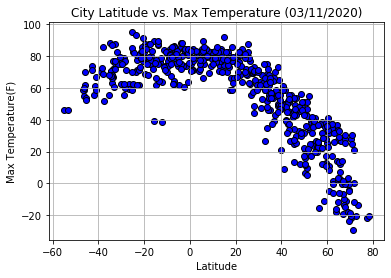

In [8]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"], facecolor="blue",edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (03/11/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("output_data/Img1.png")
plt.show()
#This scatter plot shows how the temperature of each city changes with the change is latitude

#### Latitude vs. Humidity Plot

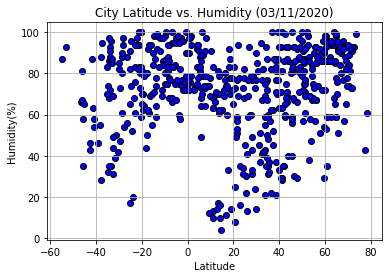

In [9]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"], facecolor="blue",edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs. Humidity (03/11/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("output_data/Img2.png")
plt.show()
#This scatter plot shows the distribution of humidity with respect to the latitude of location of each city.

#### Latitude vs. Cloudiness Plot

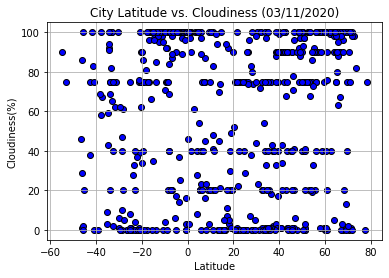

In [10]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"], facecolor="blue",edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (03/11/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("output_data/Img3.png")
plt.show()
#This scatter plot shows the cloudiness of city changes with change in latitude location of each city.

#### Latitude vs. Wind Speed Plot

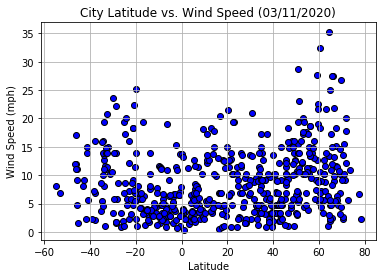

In [11]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"], facecolor="blue",edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (03/11/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Img4.png")
plt.show()
#This scatter plot shows how wind speed varies with change in latitude location of each city.
#For majority of the cities the wind speed is concentrated between 0 to 25 mph. 

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue*rvalue}")
    plt.xlabel('Latitude')
    return line_eq
    

In [13]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hem=cities_df.loc[cities_df["Lat"]>=0,:]
Northern_hem=Northern_hem.reset_index(drop=True)
Northern_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Semey,40,KZ,1583977798,92,50.41,80.23,6.8,6.71
1,Bethel,90,US,1583977802,28,41.37,-73.41,50.0,4.70
2,Port Hawkesbury,90,CA,1583977810,85,45.62,-61.35,25.0,10.29
3,Andros Town,40,BS,1583977815,78,24.70,-77.77,72.0,8.05
4,Asău,20,RO,1583977817,93,46.43,26.40,43.0,1.12


In [14]:
Southern_hem=cities_df.loc[cities_df["Lat"]<0,:]
Southern_hem=Southern_hem.reset_index(drop=True)
Southern_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Rikitea,4,PF,1583977800,76,-23.12,-134.97,77.65,12.12
1,Busselton,82,AU,1583977804,35,-33.65,115.33,77.00,11.54
2,Atuona,4,PF,1583977806,75,-9.80,-139.03,82.27,11.63
3,Pitimbu,20,BR,1583977808,83,-7.47,-34.81,80.60,4.70
4,Labuhan,100,ID,1583977813,67,-6.88,112.21,86.34,3.31


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7911980568295118


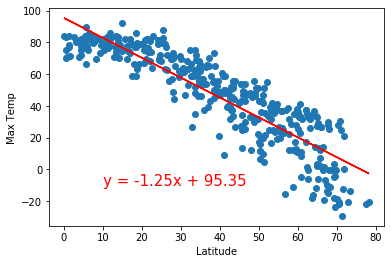

In [15]:
line_eq1=linear_regression(Northern_hem["Lat"],Northern_hem["Max Temp"])
plt.annotate(line_eq1,(10,-10),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.show()
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.19026776745934423


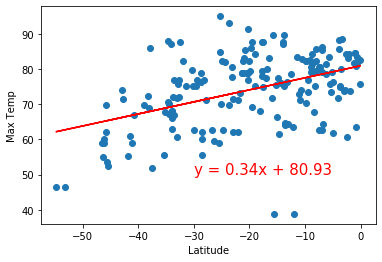

In [16]:
line_eq2=linear_regression(Southern_hem["Lat"],Southern_hem["Max Temp"])
plt.annotate(line_eq2,(-30,50),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06640014511405934


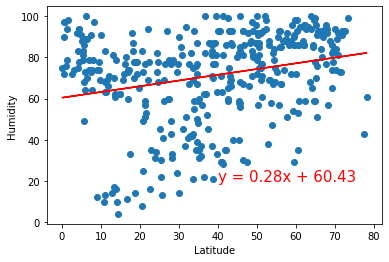

In [17]:
line_eq3=linear_regression(Northern_hem["Lat"],Northern_hem["Humidity"])
plt.annotate(line_eq3,(40,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.show()
    

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11348035869048799


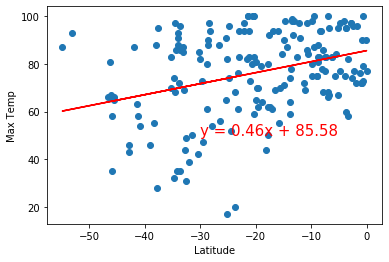

In [18]:
line_eq4=linear_regression(Southern_hem["Lat"],Southern_hem["Humidity"])
plt.annotate(line_eq4,(-30,50),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05828642024727066


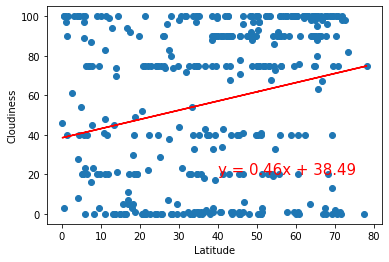

In [19]:
line_eq5=linear_regression(Northern_hem["Lat"],Northern_hem["Cloudiness"])
plt.annotate(line_eq5,(40,20),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.show()
    

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0455699874254523


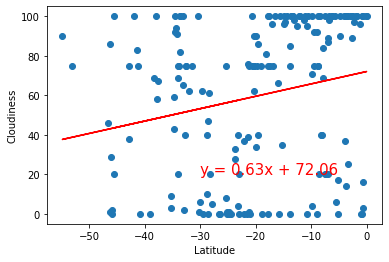

In [20]:
line_eq6=linear_regression(Southern_hem["Lat"],Southern_hem["Cloudiness"])
plt.annotate(line_eq6,(-30,20),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07624370031521299


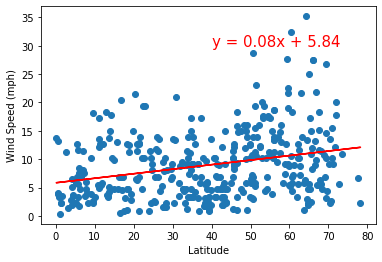

In [21]:
line_eq7=linear_regression(Northern_hem["Lat"],Northern_hem["Wind Speed"])
plt.annotate(line_eq7,(40,30),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09614496195050015


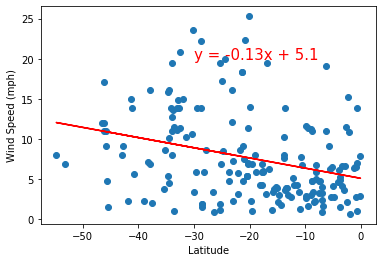

In [22]:
line_eq8=linear_regression(Southern_hem["Lat"],Southern_hem["Wind Speed"])
plt.annotate(line_eq8,(-30,20),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.show()

In [23]:
#Observations:
#1.The r-squared value of 0.79 between latitudes of northern hemisphere and respective max temperature shows that the linear regression line
# gives a good approximation of the respective data.
#2.The r-squared value of 0.19 between latitudes of southern hemisphere and respective max temperature shows that the linear regression line
# does not give a good approximation of the respective data.
#3.The r-squared value of 0.09 between the latitudes of southern hemisphere and respective wind speed shows that the linear regression line 
# gives a very poor approximation of the respective data.